# Comparison of Boercker and More Ornsten-Zernike 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.hnc import  Integral_Equation_Solver as OZ
from hnc.hnc.hnc_BandM import Integral_Equation_Solver as IET
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

from pandas import read_csv

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100


ModuleNotFoundError: No module named 'mendeleev'


## Comparison to Shaffer

In [153]:
Γi = 20
Γe = 10

Ti = 1*eV_to_AU
Te = Γi/Γe*Ti
print(f"T_i = {Ti*AU_to_K:0.2f} [K]")
print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Zi, Ze = 1, 1

ri = Zi**2/Ti/Γi
re = Ze**2/Te/Γe

ni = n_from_rs(ri)
ne = n_from_rs(re)

rei = rs_from_n(ni + ne)

m_i = m_e*50

Qsquare_matrix = np.array( [[Ze**2, Zi*Ze ],[Zi*Ze, Zi**2]])
Qsquare_matrix


T_i = 11604.53 [K]
T_e = 23209.05 [K]


array([[1, 1],
       [1, 1]])

In [156]:
n_in_rs_array = np.array([ 3/(4*π*re**3/rei**3), 3/(4*π*ri**3/rei**3)] )
T_AU_array = np.array([Te, Ti])
mass_array = np.array([m_e, m_i])

κ_screen = 0
κ_multiscale = 0.01

R_max, N_bins = 20, 1000
dst_type = 4

In [170]:
# New solver
iet = IET(2, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, dst_type = dst_type )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

iet.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 5.161e+01
1: Change in U_r: 1.650e+00, HNC Error: 3.072e-01, Total Error: 4.689e+01
2: Change in U_r: 1.430e+00, HNC Error: 3.063e-01, Total Error: 4.259e+01
3: Change in U_r: 1.246e+00, HNC Error: 3.054e-01, Total Error: 3.869e+01
4: Change in U_r: 1.090e+00, HNC Error: 3.047e-01, Total Error: 3.513e+01
5: Change in U_r: 9.578e-01, HNC Error: 3.040e-01, Total Error: 3.190e+01
6: Change in U_r: 8.441e-01, HNC Error: 3.034e-01, Total Error: 2.896e+01
7: Change in U_r: 7.459e-01, HNC Error: 3.029e-01, Total Error: 2.629e+01
8: Change in U_r: 6.606e-01, HNC Error: 3.024e-01, Total Error: 2.387e+01
9: Change in U_r: 5.862e-01, HNC Error: 3.020e-01, Total Error: 2.167e+01
10: Change in U_r: 5.210e-01, HNC Error: 3.016e-01, Total Error: 1.967e+01
11: Change in U_r: 4.638e-01, HNC Error: 3.012e-01, Total Error: 1.786e+01
12: Change in U_r: 4.134e-01, HNC Error: 3.008e-01, Total Error: 1.621e+01
13: Change in U_r: 3.688e-01, HNC Error: 3.005e-01, Total Error: 

0

In [158]:
# Old solver
Tei = (Te*m_i + Ti*m_e)/(m_e + m_i) 
T_SVT_matrix = np.array( [[Te, Tei ],[Tei, Ti  ]]  )
oz = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 5.218e+01
1: Change in c_r: 7.769e-02, HNC Error: 3.669e-02, Total Error: 4.738e+01
2: Change in c_r: 7.610e-02, HNC Error: 3.212e-02, Total Error: 4.301e+01
3: Change in c_r: 7.458e-02, HNC Error: 2.965e-02, Total Error: 3.904e+01
4: Change in c_r: 7.313e-02, HNC Error: 2.793e-02, Total Error: 3.543e+01
5: Change in c_r: 7.173e-02, HNC Error: 2.667e-02, Total Error: 3.215e+01
6: Change in c_r: 7.039e-02, HNC Error: 2.570e-02, Total Error: 2.918e+01
7: Change in c_r: 6.911e-02, HNC Error: 2.497e-02, Total Error: 2.648e+01
8: Change in c_r: 6.787e-02, HNC Error: 2.430e-02, Total Error: 2.402e+01
9: Change in c_r: 6.668e-02, HNC Error: 2.381e-02, Total Error: 2.180e+01
10: Change in c_r: 6.553e-02, HNC Error: 2.335e-02, Total Error: 1.978e+01
11: Change in c_r: 6.442e-02, HNC Error: 2.303e-02, Total Error: 1.794e+01
12: Change in c_r: 6.336e-02, HNC Error: 2.258e-02, Total Error: 1.628e+01
13: Change in c_r: 6.233e-02, HNC Error: 2.251e-02, Total Error: 

0

In [159]:
# Old solver
svt = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='svt', dst_type = dst_type)
svt.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei* np.exp(-svt.r_array[np.newaxis,np.newaxis,:]*κ_screen))

svt.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 5.192e+01
1: Change in c_r: 6.896e-02, HNC Error: 3.610e-02, Total Error: 4.716e+01
2: Change in c_r: 6.756e-02, HNC Error: 3.142e-02, Total Error: 4.283e+01
3: Change in c_r: 6.623e-02, HNC Error: 2.868e-02, Total Error: 3.889e+01
4: Change in c_r: 6.496e-02, HNC Error: 2.676e-02, Total Error: 3.531e+01
5: Change in c_r: 6.374e-02, HNC Error: 2.543e-02, Total Error: 3.206e+01
6: Change in c_r: 6.258e-02, HNC Error: 2.428e-02, Total Error: 2.910e+01
7: Change in c_r: 6.147e-02, HNC Error: 2.351e-02, Total Error: 2.641e+01
8: Change in c_r: 6.040e-02, HNC Error: 2.278e-02, Total Error: 2.397e+01
9: Change in c_r: 5.938e-02, HNC Error: 2.223e-02, Total Error: 2.176e+01
10: Change in c_r: 5.841e-02, HNC Error: 2.187e-02, Total Error: 1.975e+01
11: Change in c_r: 5.747e-02, HNC Error: 2.141e-02, Total Error: 1.793e+01
12: Change in c_r: 5.657e-02, HNC Error: 2.116e-02, Total Error: 1.627e+01
13: Change in c_r: 5.570e-02, HNC Error: 2.095e-02, Total Error: 

0

In [160]:
# iet.plot_species_convergence_c(n_slices = len(iet.h_r_matrix_list[::100]))

In [161]:
# svt.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::100]))

In [162]:
# fig, ax =  iet.plot_u_all_species()
# ax.plot(iet.r_array, iet.U_r_matrix[0,0],'--', label=r"$U_{0,0}$")
# ax.plot(iet.r_array, iet.U_r_matrix[0,1],'--', label=r"$U_{0,1}$")
# ax.plot(iet.r_array, iet.U_r_matrix[1,1],'--', label=r"$U_{1,1}$")
# plt.legend(loc='upper right')

### Data from Nathaniel and Scott

In [171]:
from pandas import read_csv

gii_data = read_csv("Shaffer2017_Fig2c_ii.txt", delim_whitespace=True, header=2)
# gii_data = read_csv("Shaffer2017_Fig2a_ii.txt", delim_whitespace=True, header=2)
# gei_data = read_csv("Shaffer2017_Fig2a_ei.txt", delim_whitespace=True, header=2)
# gee_data = read_csv("Shaffer2017_Fig2a_ee.txt", delim_whitespace=True, header=2)
# gii_data = read_csv("Shaffer2017_Fig2b_ii.txt", delim_whitespace=True, header=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


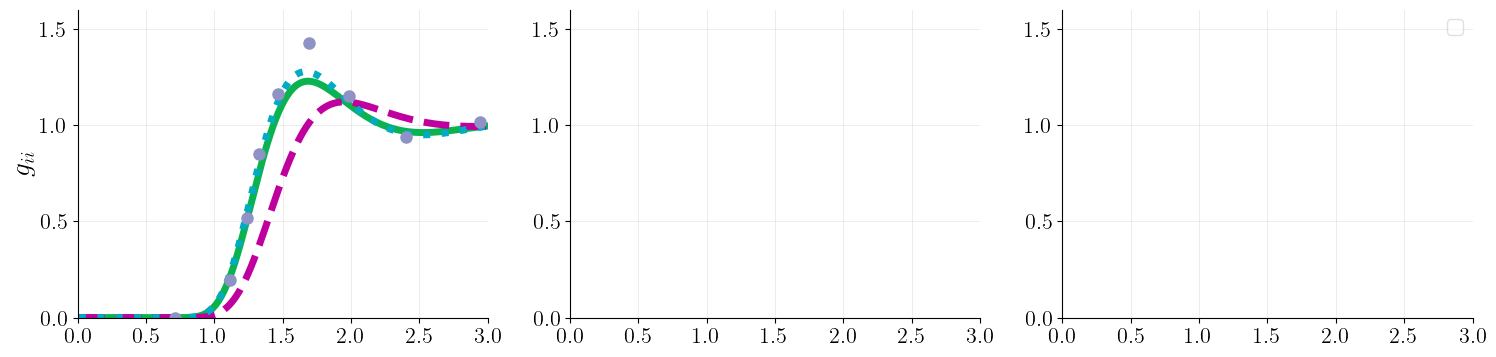

In [172]:
fig, axs = plt.subplots(1,3, figsize=(18,4))

ax = axs[0]
ax.plot(iet.r_array, iet.h_r_matrix[1,1]+1,'-', label='BM OZ',linewidth=5)
ax.plot(oz.r_array, oz.h_r_matrix[1,1]+1,'--', label="OZ MASS",linewidth=5)
ax.plot(svt.r_array, svt.h_r_matrix[1,1]+1,':', label="SVT", linewidth=5)
ax.plot(gii_data['r/a'], gii_data['gii'],'o', label="Shaffer")
ax.set_ylabel(r'$g_{ii}$')

# ax = axs[1]
# ax.plot(iet.r_array, iet.h_r_matrix[0,1]+1,'-', label='BM OZ',linewidth=5)
# ax.plot(oz.r_array, oz.h_r_matrix[0,1]+1,'--', label="OZ MASS",linewidth=5)
# ax.plot(svt.r_array, svt.h_r_matrix[0,1]+1,':', label="SVT", linewidth=5)
# ax.plot(gei_data['r/a'], gei_data['gei'],'o', label="Shaffer")
# ax.set_ylabel(r'$g_{ei}$')


# ax = axs[2]
# ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'-', label='BM OZ',linewidth=5)
# ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'--', label="OZ MASS",linewidth=5)
# ax.plot(svt.r_array, svt.h_r_matrix[0,0]+1,':', label="SVT", linewidth=5)
# ax.plot(gee_data['r/a'], gee_data['gee'],'o', label="Shaffer")
# ax.set_ylabel(r'$g_{ee}$')

for ax in axs:
    ax.set_xlim(0,3)
    ax.set_ylim(0,1.6)
ax.legend()


### Single Species Check

In [12]:
# n_in_rs_array = np.array([ 3/(4*π), 3/(4*π)] )
# T_AU_array = np.array([Te, Ti])
# mass_array = np.array([m_e, m_i])
# iet = IET(1, n_in_rs_array[0:1], T_AU_array[0:1], mass_array[0:1], κ_screen=0 )

# iet.HNC_solve(num_iterations=1e4, tol=1e-6, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
#         alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [13]:
# iet.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::10]))

In [14]:
# fig, ax =  iet.plot_u_all_species()
# ax.plot(iet.r_array, iet.U_r_matrix[0,0])


## Check Michael OCP [DOI: 10.3847/0004-637X/829/1/16](https://iopscience.iop.org/article/10.3847/0004-637X/829/1/16)

In [129]:
Γ11 = 20

T1 = 10*eV_to_AU
T2 = 10*eV_to_AU

Z1, Z2 = 1, 3
x1, x2 = 0.9, 0.1

r1 = Z1**2/T1/Γ11

n1 = n_from_rs(r1)

n = n1/x1
n2 = n*x2
r2 = rs_from_n(n2)
r12 = rs_from_n(n1 + n2)

print(f"T_1 = {T1*AU_to_K:0.2f} [K]")
print(f"T_2 = {T2*AU_to_K:0.2f} [K]")

m_1 = m_e*1
m_2 = m_e*1

Qsquare_matrix = np.array( [[Z1**2, Z1*Z2 ],[Z1*Z2, Z2**2]])
Qsquare_matrix


T_1 = 116045.25 [K]
T_2 = 116045.25 [K]


array([[1, 3],
       [3, 9]])

In [130]:
# n_in_rs_array = 0.9*np.array([ 3/(4*π), 3/(4*π*r2**3/r1**3)] )
n_in_rs_array = np.array([ 3/(4*π*r1**3/r12**3), 3/(4*π*r2**3/r12**3)] )
T_AU_array = np.array([T1, T2])
mass_array = np.array([m_1, m_2])

κ_screen = 0
κ_multiscale = 0.0

R_max, N_bins = 10, 500
dst_type =3

# New solver
iet = IET(2, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, dst_type = dst_type )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/r12 * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

# Old solver
T12 = (T1*m_2 + T2*m_1)/(m_1 + m_2) 
T_SVT_matrix = np.array( [[T1, T12 ],[T12, T2  ]]  )
oz = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/r12* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))


In [131]:
iet.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 2.104e+02
1: Change in U_r: 9.568e-02, HNC Error: 9.531e-01, Total Error: 1.938e+02
2: Change in U_r: 9.447e-02, HNC Error: 9.534e-01, Total Error: 1.785e+02
3: Change in U_r: 9.332e-02, HNC Error: 9.537e-01, Total Error: 1.643e+02
4: Change in U_r: 9.222e-02, HNC Error: 9.541e-01, Total Error: 1.513e+02
5: Change in U_r: 9.117e-02, HNC Error: 9.545e-01, Total Error: 1.392e+02
6: Change in U_r: 9.016e-02, HNC Error: 9.550e-01, Total Error: 1.281e+02
7: Change in U_r: 8.921e-02, HNC Error: 9.555e-01, Total Error: 1.179e+02
8: Change in U_r: 8.830e-02, HNC Error: 9.560e-01, Total Error: 1.085e+02
9: Change in U_r: 8.743e-02, HNC Error: 9.566e-01, Total Error: 9.984e+01
10: Change in U_r: 8.662e-02, HNC Error: 9.573e-01, Total Error: 9.188e+01
11: Change in U_r: 8.585e-02, HNC Error: 9.580e-01, Total Error: 8.457e+01
12: Change in U_r: 8.512e-02, HNC Error: 9.587e-01, Total Error: 7.785e+01
13: Change in U_r: 8.444e-02, HNC Error: 9.595e-01, Total Error: 

0

In [132]:
oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 2.104e+02
1: Change in c_r: 2.603e-01, HNC Error: 4.216e-02, Total Error: 1.938e+02
2: Change in c_r: 2.571e-01, HNC Error: 3.569e-02, Total Error: 1.785e+02
3: Change in c_r: 2.539e-01, HNC Error: 3.180e-02, Total Error: 1.643e+02
4: Change in c_r: 2.509e-01, HNC Error: 2.915e-02, Total Error: 1.513e+02
5: Change in c_r: 2.481e-01, HNC Error: 2.722e-02, Total Error: 1.392e+02
6: Change in c_r: 2.453e-01, HNC Error: 2.564e-02, Total Error: 1.281e+02
7: Change in c_r: 2.427e-01, HNC Error: 2.424e-02, Total Error: 1.179e+02
8: Change in c_r: 2.403e-01, HNC Error: 2.329e-02, Total Error: 1.085e+02
9: Change in c_r: 2.379e-01, HNC Error: 2.264e-02, Total Error: 9.984e+01
10: Change in c_r: 2.357e-01, HNC Error: 2.234e-02, Total Error: 9.188e+01
11: Change in c_r: 2.336e-01, HNC Error: 2.188e-02, Total Error: 8.457e+01
12: Change in c_r: 2.316e-01, HNC Error: 2.156e-02, Total Error: 7.785e+01
13: Change in c_r: 2.298e-01, HNC Error: 2.147e-02, Total Error: 

0

Text(0.5, 1.0, 'Now digitize data and compare...')

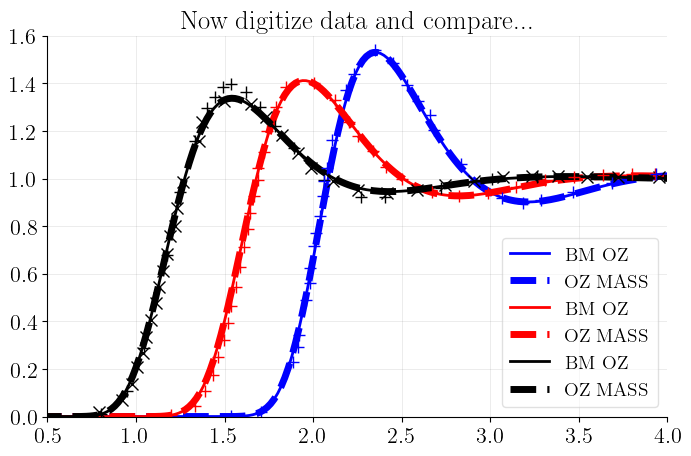

In [133]:
g11_data = read_csv("Ichimaru1993_Fig6_g11.txt", delim_whitespace=True, header=2)
g12_data = read_csv("Diaw2016_Fig4_g12.txt", delim_whitespace=True, header=2)
g22_data = read_csv("Diaw2016_Fig4_g22.txt", delim_whitespace=True, header=2)


fig, ax = plt.subplots()

ax.plot(iet.r_array, iet.h_r_matrix[1,1]+1,'b-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[1,1]+1,'b--', label="OZ MASS",linewidth=5)

ax.plot(iet.r_array, iet.h_r_matrix[1,0]+1,'r-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[1,0]+1,'r--', label="OZ MASS",linewidth=5)

ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'k-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'k--', label="OZ MASS",linewidth=5)


g11_data = read_csv("Ichimaru1993_Fig6_g11.txt", delim_whitespace=True, header=2)
ax.plot(g11_data['r/a'], g11_data['g11(r)'],'k+')
g11_data = read_csv("Diaw2016_Fig4_g11.txt", delim_whitespace=True, header=2)
ax.plot(g11_data['r/a'], g11_data['g11(r)'],'kx')


ax.plot(g12_data['r/a'], g12_data['g12(r)'],'r+')
ax.plot(g22_data['r/a'], g22_data['g22(r)'],'b+')

ax.set_xlim(0.5,4)
ax.set_ylim(0,1.6)
ax.legend()

ax.set_title("Now digitize data and compare...")

axs


/home/zach/plasma/hnc/hnc/hnc_BandM.py:995: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,10)


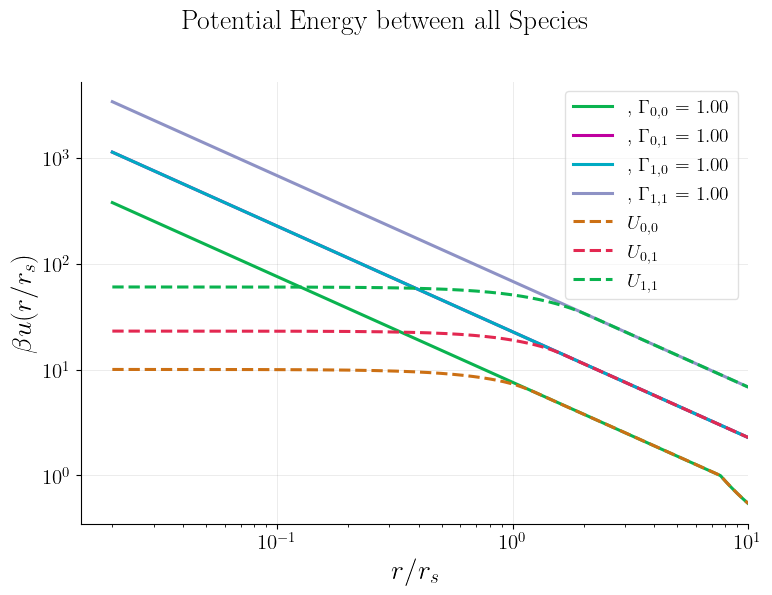

In [134]:
fig, ax =  iet.plot_u_all_species()
ax.plot(iet.r_array, iet.U_r_matrix[0,0],'--', label=r"$U_{0,0}$")
ax.plot(iet.r_array, iet.U_r_matrix[0,1],'--', label=r"$U_{0,1}$")
ax.plot(iet.r_array, iet.U_r_matrix[1,1],'--', label=r"$U_{1,1}$")
plt.legend(loc='upper right')

In [123]:
test_HNC(iet)
# test_BMOZ(iet)

HNC error: 1.570e-05


## Check OCP [DOI: 10.3847/0004-637X/829/1/16](https://iopscience.iop.org/article/10.3847/0004-637X/829/1/16)

In [53]:
Γe = 100
Te = 10*eV_to_AU

Ze = 1

re = Ze**2/Te/Γe

ne = n_from_rs(re)

print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Qsquare_matrix = np.array( [[Ze**2]])
Qsquare_matrix


T_e = 116045.25 [K]


array([[1]])

In [54]:
n_in_rs_array = np.array([ 3/(4*π)] )
T_AU_array = np.array([Te])
mass_array = np.array([m_e])

κ_screen = 2
κ_multiscale = 0.0

R_max, N_bins = 20, 1000
dst_type = 3

# New solver
iet = IET(1, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, dst_type = dst_type )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/re * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

# Old solver
T_SVT_matrix = np.array( [[Te]]  )
oz = OZ(1, np.ones((1,1)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((1,1)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/re* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))


In [55]:
iet.HNC_solve(num_iterations=1e4, tol=1e-9, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 1.226e+02
1: Change in U_r: 4.360e-02, HNC Error: 2.653e-01, Total Error: 1.140e+02
2: Change in U_r: 4.305e-02, HNC Error: 2.660e-01, Total Error: 1.059e+02
3: Change in U_r: 4.253e-02, HNC Error: 2.668e-01, Total Error: 9.834e+01
4: Change in U_r: 4.202e-02, HNC Error: 2.676e-01, Total Error: 9.131e+01
5: Change in U_r: 4.155e-02, HNC Error: 2.686e-01, Total Error: 8.476e+01
6: Change in U_r: 4.109e-02, HNC Error: 2.696e-01, Total Error: 7.867e+01
7: Change in U_r: 4.065e-02, HNC Error: 2.708e-01, Total Error: 7.300e+01
8: Change in U_r: 4.024e-02, HNC Error: 2.720e-01, Total Error: 6.773e+01
9: Change in U_r: 3.985e-02, HNC Error: 2.734e-01, Total Error: 6.284e+01
10: Change in U_r: 3.948e-02, HNC Error: 2.750e-01, Total Error: 5.830e+01
11: Change in U_r: 3.914e-02, HNC Error: 2.766e-01, Total Error: 5.410e+01
12: Change in U_r: 3.881e-02, HNC Error: 2.784e-01, Total Error: 5.020e+01
13: Change in U_r: 3.850e-02, HNC Error: 2.803e-01, Total Error: 

0

In [56]:
oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 1.226e+02
1: Change in c_r: 1.186e-01, HNC Error: 2.325e-02, Total Error: 1.140e+02
2: Change in c_r: 1.171e-01, HNC Error: 1.936e-02, Total Error: 1.059e+02
3: Change in c_r: 1.157e-01, HNC Error: 1.690e-02, Total Error: 9.834e+01
4: Change in c_r: 1.144e-01, HNC Error: 1.509e-02, Total Error: 9.131e+01
5: Change in c_r: 1.131e-01, HNC Error: 1.367e-02, Total Error: 8.476e+01
6: Change in c_r: 1.118e-01, HNC Error: 1.254e-02, Total Error: 7.867e+01
7: Change in c_r: 1.106e-01, HNC Error: 1.165e-02, Total Error: 7.300e+01
8: Change in c_r: 1.095e-01, HNC Error: 1.101e-02, Total Error: 6.773e+01
9: Change in c_r: 1.084e-01, HNC Error: 1.070e-02, Total Error: 6.284e+01
10: Change in c_r: 1.074e-01, HNC Error: 1.082e-02, Total Error: 5.830e+01
11: Change in c_r: 1.065e-01, HNC Error: 1.157e-02, Total Error: 5.410e+01
12: Change in c_r: 1.056e-01, HNC Error: 1.163e-02, Total Error: 5.020e+01
13: Change in c_r: 1.048e-01, HNC Error: 1.160e-02, Total Error: 

0

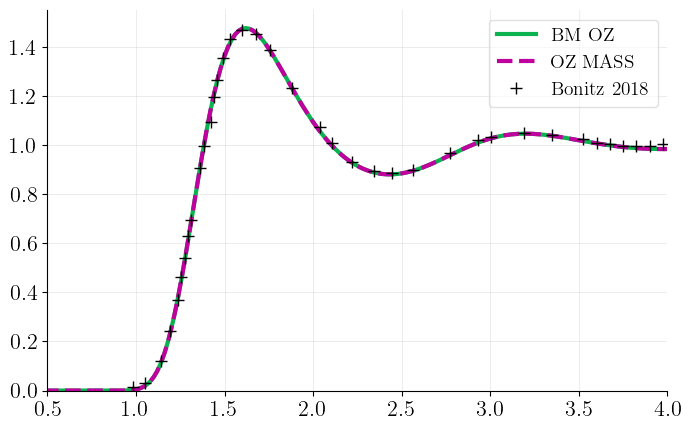

In [57]:
gii_data = read_csv("Bonitz2018_Fig3_Γ=100-HNC.txt", delim_whitespace=True, header=2)

fig, ax = plt.subplots()

ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'-', label='BM OZ',linewidth=3)
ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'--', label="OZ MASS",linewidth=3)
ax.plot(gii_data['r/a'], gii_data['gii'],'k+', label="Bonitz 2018")

# ax.plot(svt.r_array, svt.h_r_matrix[1,1]+1,':', label="SVT", linewidth=5)

ax.set_xlim(0.5,4)
ax.set_ylim(0,1.55)
ax.legend()

In [85]:
from scipy.interpolate import interp1d
def test_BMOZ(iet):
    cosθ_space = np.linspace(-1,1, num=1000)
    r_space = np.linspace(iet.r_array[0],iet.r_array[-1]/2, num=200)

    cosθ_mesh, r_mesh = np.meshgrid(cosθ_space, r_space, indexing='ij')

    drdcosθ = (r_space[1]-r_space[0]) * (cosθ_space[1]-cosθ_space[0])
    geom = drdcosθ*r_space**2*2*π


    def integrate_f1_f2(r_input, r_array, f1, f2):
        f1_interp = interp1d(r_array, f1, fill_value='extrapolate', bounds_error=False)
        f2_interp = interp1d(r_array, f2, fill_value='extrapolate', bounds_error=False)

        r1 = r_mesh
        r2 = np.sqrt(r_mesh**2 + r_input**2 + 2*cosθ_mesh*r_mesh*r_input )
        return np.sum(geom*f1_interp(r1)*f2_interp(r2))

    def get_lhs_rhs_i_j(i,j):
        rhs = np.zeros_like(iet.r_array)
        lhs = np.zeros_like(iet.r_array)
        for k in range(iet.N_species):
            rhs += -iet.rho[k]*np.array( [integrate_f1_f2(r, iet.r_array, iet.h_r_matrix[i,k], iet.β_list[k]*iet.U_r_matrix[k,j]) for r in iet.r_array])

        lhs = iet.h_r_matrix[i,j] + iet.β_list[j]*iet.U_r_matrix[i,j]
        return lhs, rhs
    
    
    # Plot
    fig, ax = plt.subplots()

    for i in range(iet.N_species):
        for j in range(iet.N_species):
            color = colors[j + iet.N_species*i]
            rhs, lhs = get_lhs_rhs_i_j(i,j)
            ax.plot(iet.r_array, rhs,'-', color=color, label=f'rhs ({i},{j})')
            ax.plot(iet.r_array, lhs,'--',color=color, label=f'lhs ({i},{j})')
            # Error estimate
            error_est = np.linalg.norm(rhs-lhs)/np.linalg.norm(lhs)
            print("{0}-{1} Estimated total OZ error: {2:.3e}".format(i,j,error_est))

    
    ax.set_yscale('symlog',linthresh=0.001)
    ax.legend()
    ax.set_title("BM OZ test LHS vs RHS")
    ax.set_ylabel("OZ sides")
    ax.set_xlabel(r"$r/r_i$")

def test_HNC(iet):
    lhs = (iet.h_r_matrix + 1)
    rhs = np.exp( -iet.β_list[np.newaxis,:,np.newaxis]*iet.u_r_matrix + iet.h_r_matrix + iet.β_list[np.newaxis,:,np.newaxis]*iet.U_r_matrix )
    error = np.linalg.norm(lhs-rhs)/np.linalg.norm(lhs)
    print(f"HNC error: {error:0.3e}")

test_BMOZ(iet)
test_HNC(iet)

# iet.h_r_matrix  + iet.β_list[np.newaxis,:,np.newaxis] * iet.U_r_matrix - iet.A_times_B(iet.h_r_matrix, iet.rho[:, np.newaxis,np.newaxis]*iet.β_list[np.newaxis,:,np.newaxis] * iet.U_r_matrix)  

0-0 Estimated total OZ error: 1.174e-03
0-1 Estimated total OZ error: 1.224e-03
Error in callback <function flush_figures at 0x7639b4d81990> (for post_execute):



KeyboardInterrupt


KeyboardInterrupt

